In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/raw_temp_db_score_v4.csv')
df.head()

C:\Users\Atharva\AppData\Local\Temp\ipykernel_50736\3326968085.py:1: DtypeWarning: Columns (7,8,9,10,11,12,13,14,20,21,22,23,24,25,26,27,33,34,35,36,37,38,39,40,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,384,385,386,387,388,389,390,391) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/raw_temp_db_score_v4.csv')


,_id,wallet_id,lp_scores[0].pool_id,lp_scores[1].pool_id,lp_scores[2].pool_id,lp_scores[3].pool_id,lp_scores[4].pool_id,lp_scores[5].pool_id,lp_scores[6].pool_id,lp_scores[7].pool_id,...,lp_scores[7].last_tx_timestamp,lp_scores[8].last_tx_timestamp,lp_scores[9].last_tx_timestamp,lp_scores[10].last_tx_timestamp,lp_scores[11].last_tx_timestamp,lp_scores[12].last_tx_timestamp,aggregated_lp_score,lp_category_breakdown.stable-stable,lp_category_breakdown.stable-volatile,lp_category_breakdown.volatile-volatile
0,6874b820a794db5e6c4c2dbf,0x0057d4a850e34bac84ed297f14ba146747b90272,0x4e68ccd3e89f51c3074ca5072bbac773960dfa36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,147.00,0.0,147.0,0.000000
1,6874b820a794db5e6c4c2dc8,0x00819eb70be2aecee2915ed76f9bb6ca2cfbd390,0x4ccd010148379ea531d6c587cfdd60180196f9b1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,52.00,0.0,52.0,0.000000
2,6874b821a794db5e6c4c2dee,0x00d4c206ae699d5d2bf19a542a544276dc50889c,0x167384319b41f7094e62f7506409eb38079abff8,0x50eaedb835021e4a108b7290636d62e9765cc6d7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296.56,0.0,0.0,348.895306
3,6874b822a794db5e6c4c2e23,0x0052830c57696794e3999ed44dd2bb20d286a19b,0xdfcfdf5dd0569d591e0bce28b5da3b13de09e3cb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,341.70,0.0,0.0,402.000000
4,6874b822a794db5e6c4c2e3f,0x007c70e81c0430f39c965a0819293e1745f1e443,0x4e68ccd3e89f51c3074ca5072bbac773960dfa36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,284.00,0.0,284.0,0.000000


In [4]:
df.duplicated().sum()

0

In [5]:
df =df.fillna(0)

In [6]:
df.dtypes

_id                                         object
wallet_id                                   object
lp_scores[0].pool_id                        object
lp_scores[1].pool_id                        object
lp_scores[2].pool_id                        object
                                            ...   
lp_scores[12].last_tx_timestamp             object
aggregated_lp_score                        float64
lp_category_breakdown.stable-stable        float64
lp_category_breakdown.stable-volatile      float64
lp_category_breakdown.volatile-volatile    float64
Length: 396, dtype: object

## Validation, Explanation

In [7]:
score_components = [
    "deposit_volume_score",
    "withdraw_volume_score",
    "deposit_frequency_score",
    "avg_holding_time_score",
    "liquidity_retention_score",
    "lp_volatility_score",
    "time_score",
    "total_score"
]

agg_data = pd.DataFrame()
agg_data['wallet_id'] = df['wallet_id']
agg_data['aggregated_lp_score'] = df['aggregated_lp_score']

In [8]:
for comp in score_components:
    cols = [c for c in df.columns if f".score_breakdown.{comp}" in c]
    agg_data[comp] = df[cols].sum(axis=1)


In [9]:
agg_data.head()

,wallet_id,aggregated_lp_score,deposit_volume_score,withdraw_volume_score,deposit_frequency_score,avg_holding_time_score,liquidity_retention_score,lp_volatility_score,time_score,total_score
0,0x0057d4a850e34bac84ed297f14ba146747b90272,147.00,44.0,0.0,22.0,77.0,0.0,0.0,4.0,147.0
1,0x00819eb70be2aecee2915ed76f9bb6ca2cfbd390,52.00,0.0,0.0,50.0,0.0,0.0,0.0,2.0,52.0
2,0x00d4c206ae699d5d2bf19a542a544276dc50889c,296.56,118.0,100.0,25.0,150.0,0.0,0.0,35.0,428.0
3,0x0052830c57696794e3999ed44dd2bb20d286a19b,341.70,112.0,0.0,22.0,118.0,0.0,150.0,0.0,402.0
4,0x007c70e81c0430f39c965a0819293e1745f1e443,284.00,45.0,0.0,0.0,87.0,0.0,150.0,2.0,284.0


In [10]:
agg_data.to_csv("data/score_components.csv",index=False)

In [11]:
import numpy as np

# get exact matches
exact_match_rate = (agg_data["aggregated_lp_score"] == agg_data["total_score"]).mean()
print("Exact matches % :", exact_match_rate * 100)


Exact matches % : 40.57587548638132


In [112]:
higher_total = (agg_data["aggregated_lp_score"] < agg_data["total_score"]).mean()
print("Higher Total Scores % :", higher_total * 100)

Higher Total Scores % : 54.64369093941078


In [114]:
lower_total = (agg_data["aggregated_lp_score"] > agg_data["total_score"]).mean()
print("Lower Total Scores % :", lower_total * 100)

Lower Total Scores % : 4.780433574207893


In [12]:
# Correlation b/w aggregated_score and total_score
corr = np.corrcoef(agg_data["aggregated_lp_score"], agg_data["total_score"])[0,1]
print("Correlation:", corr)


Correlation: 0.6345904298552673


In [111]:
# Difference distribution
agg_data["diff_pool"] = agg_data["total_score"] - agg_data["aggregated_lp_score"]
print(agg_data["diff_pool"].describe())

count    44975.000000
mean        89.553585
std        190.325223
min       -122.250000
25%          0.000000
50%         34.050000
75%         67.350000
max       4069.120000
Name: diff_pool, dtype: float64


In [14]:
summaryQ1P1 = f"""
1. Exact Matches:
40.6% of wallets match --> aggregated_lp_score = sum(per-pool total_score)

2. Correlation value between aggregate and total lp scores is 0.63 , which suggests a moderate relationship.

3. Default formula for 41% of wallets --> sum of per-pool totals (because total_score and aggregate_score match).

"""

In [15]:
tolerance_value = 1e-6
agg_data['pool_relationship'] = np.where(
    (agg_data['diff_pool'].abs() < tolerance_value),"exact_match",
    np.where(agg_data['diff_pool'] > 0, "pool_total_higher","pool_total_lower")
)

In [16]:
exact_match_bucket = agg_data[agg_data["pool_relationship"] == "exact_match"].copy()
higher_total_bucket = agg_data[agg_data["pool_relationship"] == "pool_total_higher"].copy()
lower_total_bucket = agg_data[agg_data["pool_relationship"] == "pool_total_lower"].copy()

In [17]:
exact_match_bucket.shape, higher_total_bucket.shape, lower_total_bucket.shape

((18249, 12), (24576, 12), (2150, 12))

In [18]:
exact_match_bucket.head()

,wallet_id,aggregated_lp_score,deposit_volume_score,withdraw_volume_score,deposit_frequency_score,avg_holding_time_score,liquidity_retention_score,lp_volatility_score,time_score,total_score,diff_pool,pool_relationship
0,0x0057d4a850e34bac84ed297f14ba146747b90272,147.0,44.0,0.0,22.0,77.0,0.0,0.0,4.0,147.0,0.0,exact_match
1,0x00819eb70be2aecee2915ed76f9bb6ca2cfbd390,52.0,0.0,0.0,50.0,0.0,0.0,0.0,2.0,52.0,0.0,exact_match
4,0x007c70e81c0430f39c965a0819293e1745f1e443,284.0,45.0,0.0,0.0,87.0,0.0,150.0,2.0,284.0,0.0,exact_match
5,0x0077a0eae57c0e6d73acd6ddff0205995687ccd6,496.0,41.0,99.0,0.0,38.0,150.0,150.0,18.0,496.0,0.0,exact_match
8,0x011c0b0dc1dc2125c2a310240ece961436112a63,372.0,103.0,95.0,0.0,132.0,0.0,0.0,42.0,372.0,0.0,exact_match


In [19]:
higher_total_bucket.head()

,wallet_id,aggregated_lp_score,deposit_volume_score,withdraw_volume_score,deposit_frequency_score,avg_holding_time_score,liquidity_retention_score,lp_volatility_score,time_score,total_score,diff_pool,pool_relationship
2,0x00d4c206ae699d5d2bf19a542a544276dc50889c,296.56,118.0,100.0,25.0,150.0,0.0,0.0,35.0,428.0,131.44,pool_total_higher
3,0x0052830c57696794e3999ed44dd2bb20d286a19b,341.70,112.0,0.0,22.0,118.0,0.0,150.0,0.0,402.0,60.30,pool_total_higher
6,0x00fdeb61315dffc6a1b083497e39c67be68c5b59,545.70,112.0,99.0,0.0,136.0,250.0,0.0,45.0,642.0,96.30,pool_total_higher
7,0x013e9d280d9716e5ed41eb1641c92937ac36b4a5,242.25,42.0,100.0,0.0,130.0,0.0,0.0,13.0,285.0,42.75,pool_total_higher
10,0x002fe502a3c31fb20340829cee70d95f5f85a535,213.70,63.0,0.0,122.0,78.0,0.0,150.0,0.0,413.0,199.30,pool_total_higher


In [20]:
lower_total_bucket.head()

,wallet_id,aggregated_lp_score,deposit_volume_score,withdraw_volume_score,deposit_frequency_score,avg_holding_time_score,liquidity_retention_score,lp_volatility_score,time_score,total_score,diff_pool,pool_relationship
24,0x003b2307215dc1b2ee988c6e2ad6cdd1a3503aea,358.80,112.0,0.0,50.0,150.0,0.0,0.0,0.0,312.0,-46.80,pool_total_lower
36,0x01de494230b03989f9a2d8956fdfe5486d712ebf,65.55,0.0,0.0,34.0,0.0,0.0,0.0,23.0,57.0,-8.55,pool_total_lower
38,0x00dde8eed75884f3793bf49b40df36488d5fef2f,59.80,0.0,0.0,22.0,0.0,0.0,0.0,30.0,52.0,-7.80,pool_total_lower
43,0x0100a6e67f6abc0c452395eeca488c51b976b516,50.60,0.0,0.0,34.0,0.0,0.0,0.0,10.0,44.0,-6.60,pool_total_lower
58,0x019ee51c92802065c935dcb8f793016ec31e1e55,93.15,0.0,0.0,50.0,0.0,0.0,0.0,31.0,81.0,-12.15,pool_total_lower


In [21]:
high_total_wallet_activity = pd.DataFrame()
low_total_wallet_activity = pd.DataFrame()

In [22]:
# wallets with higher aggregated_score
high_total_wallet_activity['wallet_id'] = higher_total_bucket['wallet_id']
high_total_wallet_activity['aggregated_lp_score'] = higher_total_bucket['aggregated_lp_score']

# wallets with lower aggregated_score
low_total_wallet_activity['wallet_id'] = lower_total_bucket['wallet_id']
low_total_wallet_activity['aggregated_lp_score'] = lower_total_bucket['aggregated_lp_score']


In [23]:
activity_comp_list = ["num_deposits", "num_withdrawals", 
"avg_holding_days","min_holding_days","max_holding_days", "liquidity_percent_remaining", 
"retained_liquidity", "lp_volatility_stddev", 
"dust_deposit_count", "dust_deposit_volume", 
"total_deposit_all_time", "total_withdraw_all_time"]

In [24]:
# for wallets with higher total_score than aggregated_score
for comp in activity_comp_list:
    cols = [c for c in df.columns if f".{comp}" in c]
    high_total_wallet_activity[comp] = df[df["wallet_id"].isin(higher_total_bucket["wallet_id"])][cols].sum(axis=1).values

# for wallets with lower total_score than aggregated_score
for comp in activity_comp_list:
    cols = [c for c in df.columns if f".{comp}" in c]
    low_total_wallet_activity[comp] = df[df["wallet_id"].isin(lower_total_bucket["wallet_id"])][cols].sum(axis=1).values

In [25]:
high_total_wallet_activity.shape, low_total_wallet_activity.shape

((24576, 14), (2150, 14))

In [26]:
high_total_wallet_activity.head()

,wallet_id,aggregated_lp_score,num_deposits,num_withdrawals,avg_holding_days,min_holding_days,max_holding_days,liquidity_percent_remaining,retained_liquidity,lp_volatility_stddev,dust_deposit_count,dust_deposit_volume,total_deposit_all_time,total_withdraw_all_time
2,0x00d4c206ae699d5d2bf19a542a544276dc50889c,296.56,58.0,47.0,257.473268,0.417894,972.021693,0.251350,20200.775691,7902.444741,13.0,453.871893,8.061399e+04,6.041321e+04
3,0x0052830c57696794e3999ed44dd2bb20d286a19b,341.70,6.0,2.0,74.529709,1.599352,111.794911,0.000000,-3263.061206,0.000000,0.0,0.000000,4.910500e+06,4.913763e+06
6,0x00fdeb61315dffc6a1b083497e39c67be68c5b59,545.70,2.0,2.0,139.614861,139.614861,139.614861,0.901011,91072.096340,357.320016,0.0,0.000000,1.010777e+05,1.000563e+04
7,0x013e9d280d9716e5ed41eb1641c92937ac36b4a5,242.25,2.0,3.0,60.340139,60.340139,60.340139,0.000000,-296.251737,3913.728832,0.0,0.000000,1.198530e+04,1.228155e+04
10,0x002fe502a3c31fb20340829cee70d95f5f85a535,213.70,4.0,4.0,9.069861,9.069861,9.069861,0.000000,-2150.054563,0.000000,1.0,40.378142,1.248466e+03,3.398521e+03


In [27]:
low_total_wallet_activity.head()

,wallet_id,aggregated_lp_score,num_deposits,num_withdrawals,avg_holding_days,min_holding_days,max_holding_days,liquidity_percent_remaining,retained_liquidity,lp_volatility_stddev,dust_deposit_count,dust_deposit_volume,total_deposit_all_time,total_withdraw_all_time
24,0x003b2307215dc1b2ee988c6e2ad6cdd1a3503aea,358.80,22.0,10.0,22.594075,0.016319,243.513099,0.000019,0.611258,2235.019268,0.0,0.000000,31915.16145,31914.550200
36,0x01de494230b03989f9a2d8956fdfe5486d712ebf,65.55,6.0,2.0,0.000000,0.000000,0.000000,0.000000,-3.116186,0.000000,3.0,3.162770,0.00000,3.116186
38,0x00dde8eed75884f3793bf49b40df36488d5fef2f,59.80,4.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.206987,0.000000,2.0,1.219782,0.00000,1.206987
43,0x0100a6e67f6abc0c452395eeca488c51b976b516,50.60,6.0,1.0,0.000000,0.000000,0.000000,0.000000,-2.122316,0.000000,3.0,2.122728,0.00000,2.122316
58,0x019ee51c92802065c935dcb8f793016ec31e1e55,93.15,6.0,2.0,0.000000,0.000000,0.000000,0.000000,-3.508533,0.000000,3.0,3.479257,0.00000,3.508533


In [28]:
high_total_wallet_activity.to_csv("data/high_total_wallets.csv",index=False)
low_total_wallet_activity.to_csv("data/low_total_wallets.csv",index=False)

### Analysis of wallets that have a boost (lower_total_bucket)

In [29]:
from sklearn.ensemble import RandomForestRegressor
import shap

In [30]:
x_l = low_total_wallet_activity[activity_comp_list]
y_l = low_total_wallet_activity['aggregated_lp_score']

In [31]:
rf_l = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    max_depth=None,
    n_jobs=-1
)

rf_l.fit(x_l,y_l)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [32]:
rf_l.score(X=x_l,y=y_l)

0.9968489485640674

In [34]:
explainer_l = shap.TreeExplainer(rf_l)
shap_values_l = explainer_l.shap_values(X=x_l)

In [35]:
shap_importance_l = pd.DataFrame({
    "feature": x_l.columns,
    "importance": np.abs(shap_values_l).mean(axis=0)
}).sort_values(by="importance", ascending=False)

In [36]:
shap_importance_l

,feature,importance
3,min_holding_days,111.717502
4,max_holding_days,31.666060
10,total_deposit_all_time,23.014579
7,lp_volatility_stddev,17.083508
2,avg_holding_days,15.863681
0,num_deposits,7.839455
5,liquidity_percent_remaining,5.018525
11,total_withdraw_all_time,4.240150
1,num_withdrawals,2.628603
9,dust_deposit_volume,2.197631


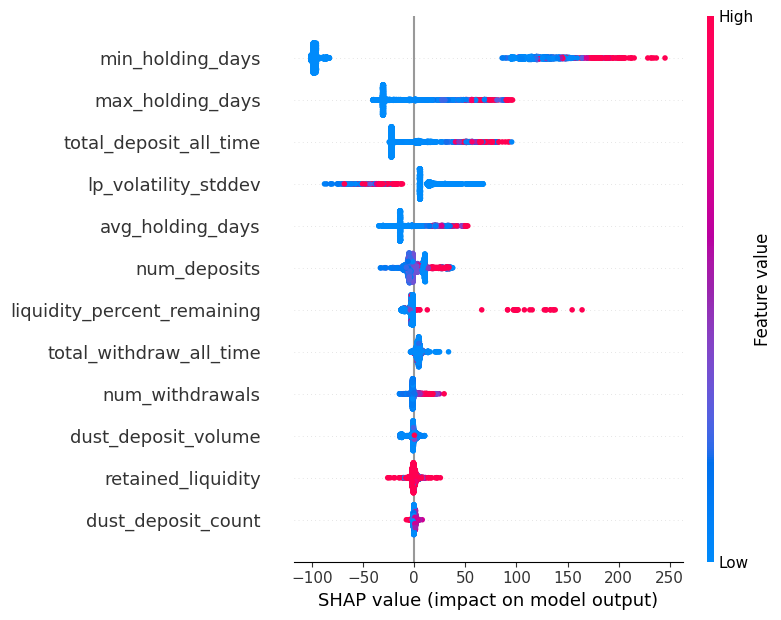

In [37]:
shap.summary_plot(shap_values_l,x_l)

In [115]:
top_features_l = [
    "min_holding_days",
    "max_holding_days",
    "total_deposit_all_time",
    "lp_volatility_stddev",
    "avg_holding_days"
]

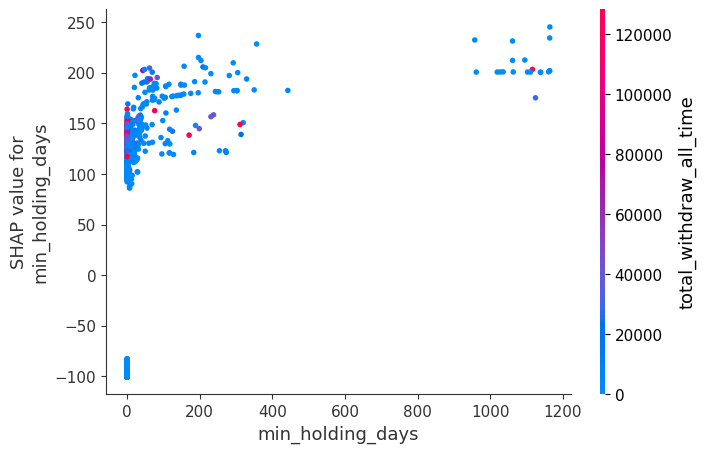

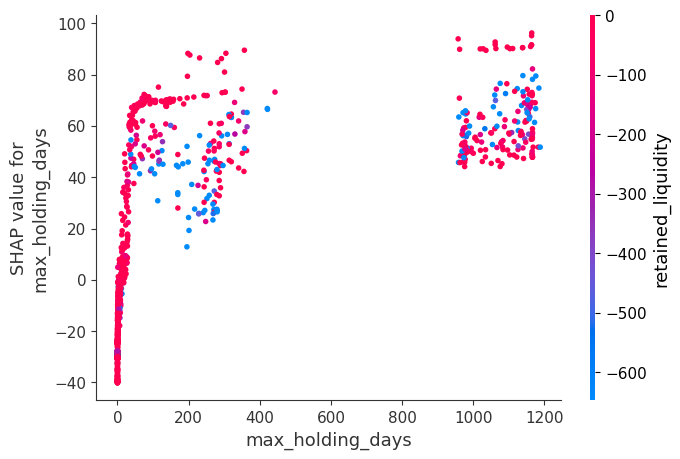

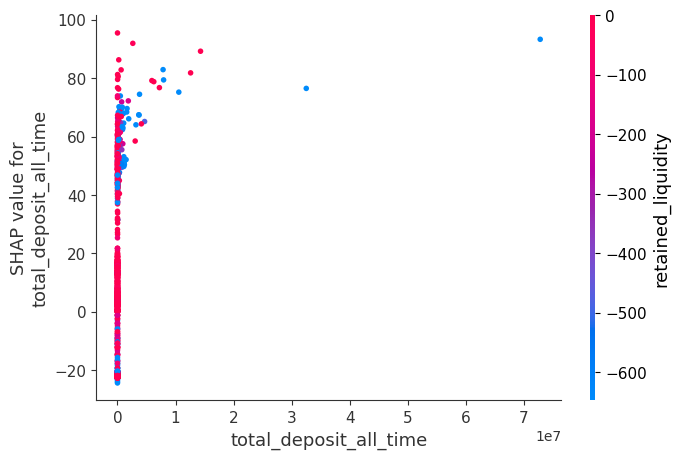

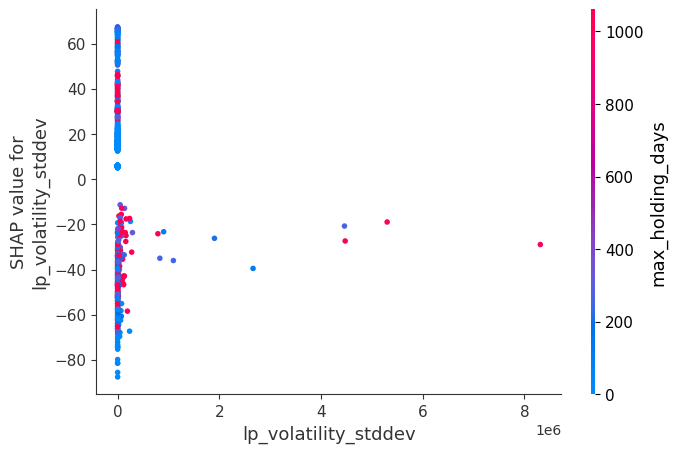

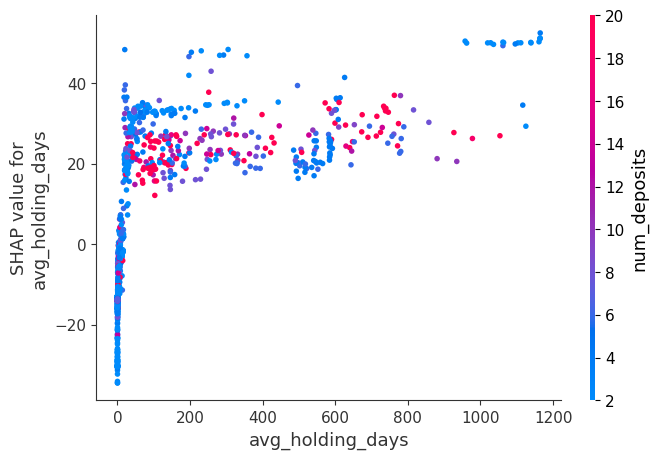

In [116]:
for feature in top_features_l:
    shap.dependence_plot(feature, shap_values_l, x_l)

### Analysis of wallets that have penalty (higher_total_bucket)

In [40]:
x_h = high_total_wallet_activity[activity_comp_list]
y_h = high_total_wallet_activity['aggregated_lp_score']

In [41]:
sample_x = x_h.sample(2000)

In [42]:
rf_h = RandomForestRegressor(
    n_estimators= 300,
    random_state=42,
    max_depth=None,
    n_jobs = -1
)

rf_h.fit(X=x_h,y=y_h)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [43]:
rf_h.score(X=x_h,y=y_h)

0.9740822037078851

In [47]:
explainer_h = shap.TreeExplainer(rf_h,x_h)
shap_values_h = explainer_h.shap_values(x_h)

100%|===================| 24575/24576 [133:02<00:00]        

In [48]:
shap_importance_h = pd.DataFrame({
    "feature": x_h.columns,
    "importance": np.abs(shap_values_h).mean(axis=0)
}).sort_values(by="importance", ascending=False)

In [49]:
shap_importance_h

,feature,importance
4,max_holding_days,36.939973
7,lp_volatility_stddev,34.669346
5,liquidity_percent_remaining,25.351504
10,total_deposit_all_time,22.188587
6,retained_liquidity,14.843087
0,num_deposits,12.254849
11,total_withdraw_all_time,8.237025
3,min_holding_days,5.632415
2,avg_holding_days,3.508293
1,num_withdrawals,2.468953


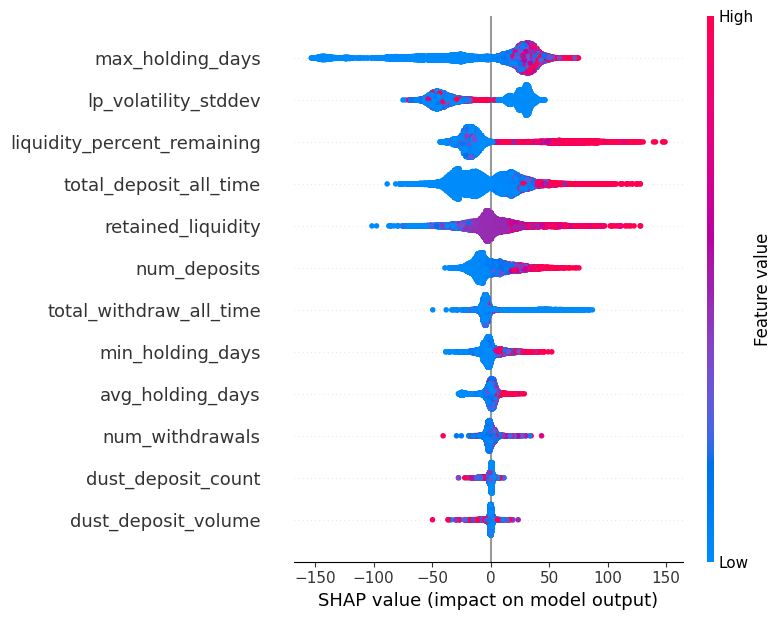

In [50]:
shap.summary_plot(shap_values_h,x_h)

In [51]:
top_features_h = [
    "max_holding_days",
    "lp_volatility_stddev",
    "liquidity_percent_remaining",
    "total_deposit_all_time",
    "retained_liquidity"
]

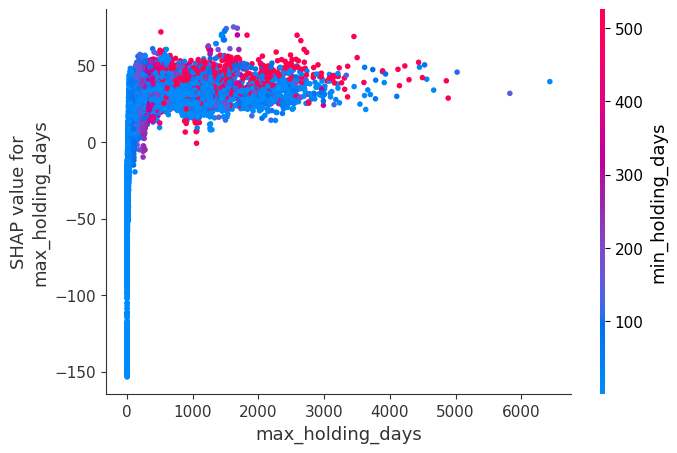

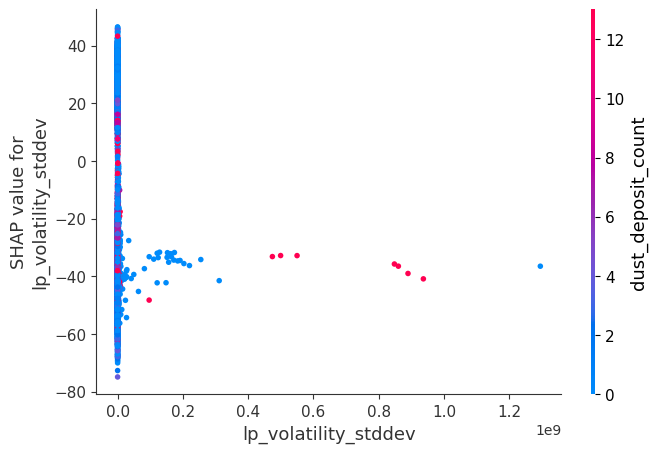

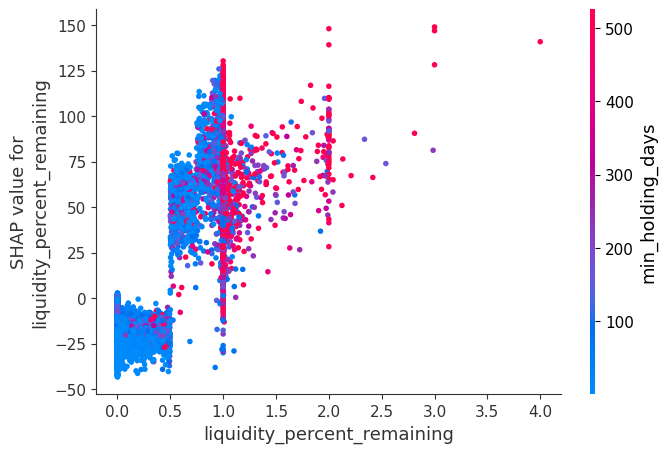

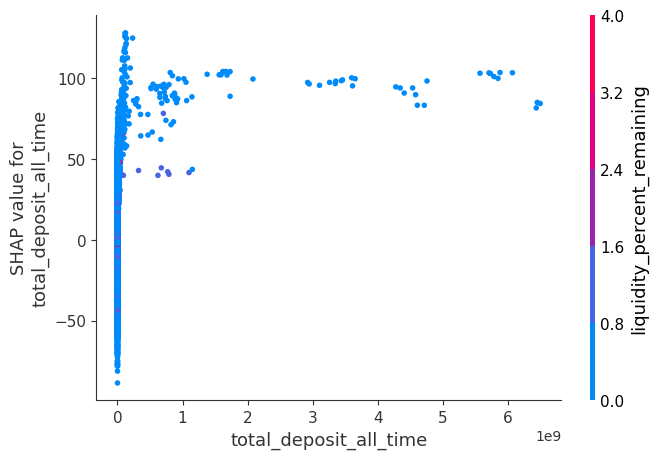

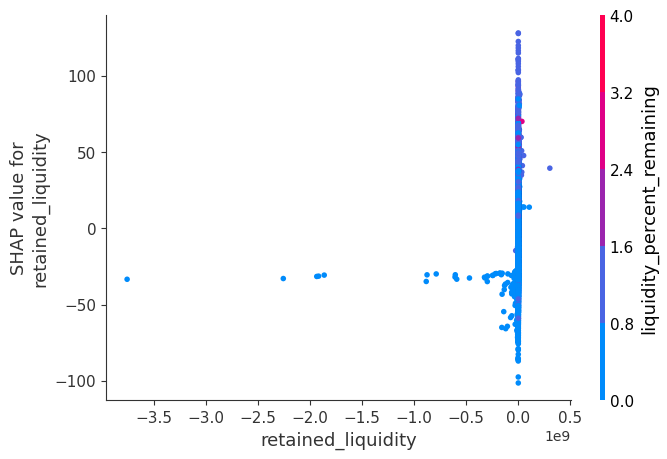

In [52]:
for feature in top_features_h:
    shap.dependence_plot(feature, shap_values_h, x_h)

### Getting the Anomalies in both buckets

In [67]:
low_total_wallet_activity = low_total_wallet_activity.merge(
    lower_total_bucket[['wallet_id','total_score']], on='wallet_id',how='left'
)

In [96]:
low_total_wallet_activity.head()

,wallet_id,aggregated_lp_score,num_deposits,num_withdrawals,avg_holding_days,min_holding_days,max_holding_days,liquidity_percent_remaining,retained_liquidity,lp_volatility_stddev,dust_deposit_count,dust_deposit_volume,total_deposit_all_time,total_withdraw_all_time,total_score,diff
0,0x003b2307215dc1b2ee988c6e2ad6cdd1a3503aea,358.80,22.0,10.0,22.594075,0.016319,243.513099,0.000019,0.611258,2235.019268,0.0,0.000000,31915.16145,31914.550200,312.0,-46.80
1,0x01de494230b03989f9a2d8956fdfe5486d712ebf,65.55,6.0,2.0,0.000000,0.000000,0.000000,0.000000,-3.116186,0.000000,3.0,3.162770,0.00000,3.116186,57.0,-8.55
2,0x00dde8eed75884f3793bf49b40df36488d5fef2f,59.80,4.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.206987,0.000000,2.0,1.219782,0.00000,1.206987,52.0,-7.80
3,0x0100a6e67f6abc0c452395eeca488c51b976b516,50.60,6.0,1.0,0.000000,0.000000,0.000000,0.000000,-2.122316,0.000000,3.0,2.122728,0.00000,2.122316,44.0,-6.60
4,0x019ee51c92802065c935dcb8f793016ec31e1e55,93.15,6.0,2.0,0.000000,0.000000,0.000000,0.000000,-3.508533,0.000000,3.0,3.479257,0.00000,3.508533,81.0,-12.15


In [69]:
high_total_wallet_activity = high_total_wallet_activity.merge(
    higher_total_bucket[['wallet_id','total_score']], on='wallet_id', how='left'
)

In [71]:
high_total_wallet_activity.head()

,wallet_id,aggregated_lp_score,num_deposits,num_withdrawals,avg_holding_days,min_holding_days,max_holding_days,liquidity_percent_remaining,retained_liquidity,lp_volatility_stddev,dust_deposit_count,dust_deposit_volume,total_deposit_all_time,total_withdraw_all_time,total_score
0,0x00d4c206ae699d5d2bf19a542a544276dc50889c,296.56,58.0,47.0,257.473268,0.417894,972.021693,0.251350,20200.775691,7902.444741,13.0,453.871893,8.061399e+04,6.041321e+04,428.0
1,0x0052830c57696794e3999ed44dd2bb20d286a19b,341.70,6.0,2.0,74.529709,1.599352,111.794911,0.000000,-3263.061206,0.000000,0.0,0.000000,4.910500e+06,4.913763e+06,402.0
2,0x00fdeb61315dffc6a1b083497e39c67be68c5b59,545.70,2.0,2.0,139.614861,139.614861,139.614861,0.901011,91072.096340,357.320016,0.0,0.000000,1.010777e+05,1.000563e+04,642.0
3,0x013e9d280d9716e5ed41eb1641c92937ac36b4a5,242.25,2.0,3.0,60.340139,60.340139,60.340139,0.000000,-296.251737,3913.728832,0.0,0.000000,1.198530e+04,1.228155e+04,285.0
4,0x002fe502a3c31fb20340829cee70d95f5f85a535,213.70,4.0,4.0,9.069861,9.069861,9.069861,0.000000,-2150.054563,0.000000,1.0,40.378142,1.248466e+03,3.398521e+03,413.0


In [98]:
from sklearn.ensemble import IsolationForest

In [100]:
x_low = low_total_wallet_activity[top_features_l]
isoforest_l = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42
)

low_total_wallet_activity['anomaly_score'] = isoforest_l.fit_predict(x_low)

In [102]:
x_high = high_total_wallet_activity[top_features_h]
isoforest_h = isoforest_l
high_total_wallet_activity['anomaly_score'] = isoforest_h.fit_predict(x_high)


In [103]:
anomalies_low = low_total_wallet_activity[low_total_wallet_activity['anomaly_score'] == -1]
anomalies_high = high_total_wallet_activity[high_total_wallet_activity['anomaly_score'] == -1]

In [104]:
len(anomalies_low),len(anomalies_high)

(108, 1229)

In [107]:
anomalies_low.head()

,wallet_id,aggregated_lp_score,num_deposits,num_withdrawals,avg_holding_days,min_holding_days,max_holding_days,liquidity_percent_remaining,retained_liquidity,lp_volatility_stddev,dust_deposit_count,dust_deposit_volume,total_deposit_all_time,total_withdraw_all_time,total_score,diff,anomaly_score
38,0x070ae2385dedc927f821e75434e881ca5fd549fb,584.20,54.0,27.0,73.366137,0.000856,980.922933,0.000422,5318.898232,79717.244230,0.0,0.000000,1.259191e+07,1.258660e+07,508.0,-76.20,-1
66,0x098ddb5f48ad1daa5f691c4b2ad6360e45a22747,471.50,10.0,19.0,255.092576,3.059005,971.681084,0.000000,-236758.165800,97977.605540,0.0,0.000000,9.709126e+04,3.338494e+05,410.0,-61.50,-1
94,0x0d625556f0afd23ff576cdf618c374092c2a54a7,724.50,2.0,0.0,1161.239035,1161.239035,1161.239035,1.000000,342.918225,0.000000,0.0,0.000000,3.429182e+02,0.000000e+00,630.0,-94.50,-1
104,0x0e21755c668c41bc0be6d63d0a932735cc20113f,724.50,2.0,0.0,1163.960127,1163.960127,1163.960127,1.000000,593.043891,0.000000,0.0,0.000000,5.930439e+02,0.000000e+00,630.0,-94.50,-1
105,0x0e1cfef85d4e4eaf383dfa65fa3789c9a91b85f9,435.85,662.0,175.0,102.730367,0.011053,271.046087,0.000000,-1381.362294,2560.835697,39.0,1414.914421,1.156829e+06,1.158210e+06,379.0,-56.85,-1


In [108]:
anomalies_high.head()

,wallet_id,aggregated_lp_score,num_deposits,num_withdrawals,avg_holding_days,min_holding_days,max_holding_days,liquidity_percent_remaining,retained_liquidity,lp_volatility_stddev,dust_deposit_count,dust_deposit_volume,total_deposit_all_time,total_withdraw_all_time,total_score,diff,anomaly_score
64,0x0039b625b1d8632c7a0057c964ec58a9f39789d3,395.30,70.0,71.0,1354.682174,73.398889,3887.292223,0.000000,-8.843666e+08,3.111874e+08,0.0,0.000000,2.999326e+08,1.184299e+09,1573.0,1177.70,-1
107,0x006eb2547a4058a6ad1b08aa4afeadcf094dca39,405.08,118.0,65.0,351.013174,2.281713,675.015835,0.004131,-3.417100e+05,2.171160e+05,0.0,0.000000,2.233956e+06,2.575666e+06,828.0,422.92,-1
127,0x01a2a10ed806d4e65ad92c2c6b10bc4d5f37001e,334.56,26.0,11.0,396.969391,18.981748,1648.062014,0.296540,-3.528319e+04,1.239219e+06,0.0,0.000000,3.127144e+06,3.162427e+06,769.0,434.44,-1
147,0x0202ed9ff0d505f9b064a610199a001cef9977bd,359.30,78.0,29.0,1316.518306,0.044792,2999.919594,0.018770,6.678001e+03,9.498801e+03,0.0,0.000000,1.003230e+06,9.965523e+05,710.0,350.70,-1
179,0x015223823352b7bb46f235bf8fd01b23dca76a9a,539.75,248.0,35.0,518.288873,0.212153,830.127220,0.748726,1.038495e+07,3.159425e+06,1.0,0.267898,1.387015e+07,3.485204e+06,635.0,95.25,-1


In [109]:
anomalies_list = []

for i, row in anomalies_low.iterrows():
    for feature in top_features_l:
        anomalies_list.append({
            'wallet_id': row['wallet_id'],
            'reason': f'Unexpected behaviour due to {feature}',
            'metric': feature,
            'value': row[feature]
        })

for i, row in anomalies_high.iterrows():
    for feature in top_features_h:
        anomalies_list.append({
            'wallet_id': row['wallet_id'],
            'reason': f'Unexpected behaviour due to {feature}',
            'metric': feature,
            'value': row[feature]
        })

In [110]:
anomalies_df = pd.DataFrame(anomalies_list)
anomalies_df.to_csv('anomalies1.csv', index=False)

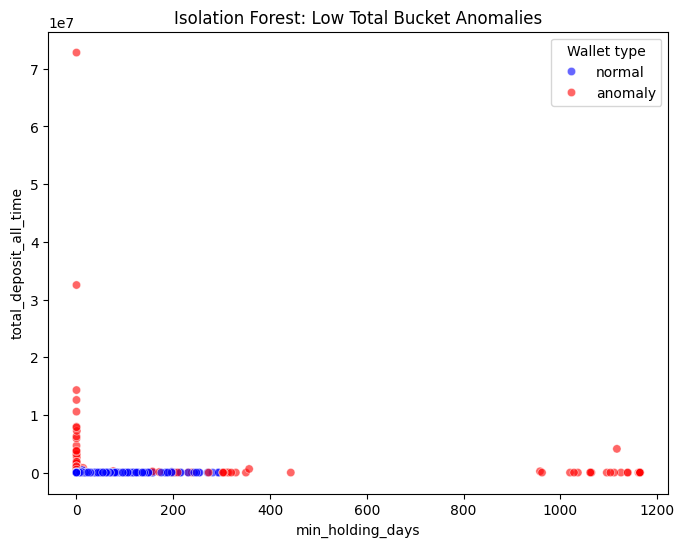

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Low bucket visualization
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=top_features_l[0],
    y=top_features_l[2],
    data=low_total_wallet_activity,
    hue=low_total_wallet_activity['anomaly_score'].map({1:'normal', -1:'anomaly'}),
    palette={'normal':'blue', 'anomaly':'red'},
    alpha=0.6
)
plt.title('Isolation Forest: Low Total Bucket Anomalies')
plt.xlabel(top_features_l[0])
plt.ylabel(top_features_l[2])
plt.legend(title='Wallet type')
plt.show()



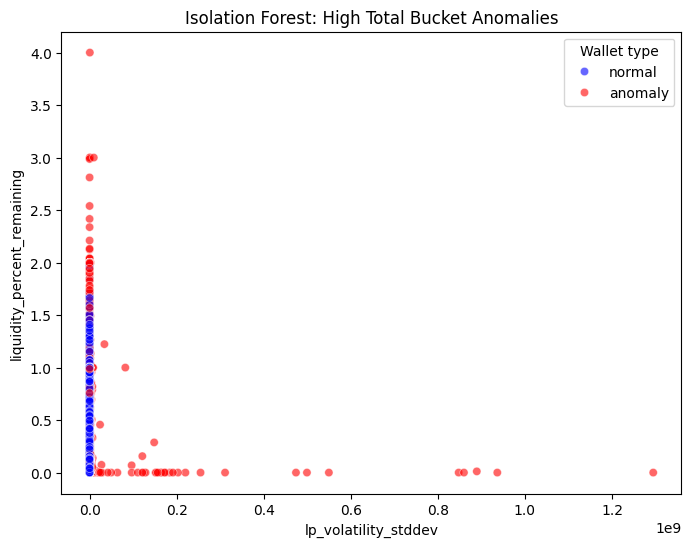

In [118]:
# High bucket visualization
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=top_features_h[1],  # e.g., 'lp_volatility_stddev'
    y=top_features_h[2],  # e.g., 'liquidity_percent_remaining'
    data=high_total_wallet_activity,
    hue=high_total_wallet_activity['anomaly_score'].map({1:'normal', -1:'anomaly'}),
    palette={'normal':'blue', 'anomaly':'red'},
    alpha=0.6
)
plt.title('Isolation Forest: High Total Bucket Anomalies')
plt.xlabel(top_features_h[1])
plt.ylabel(top_features_h[2])
plt.legend(title='Wallet type')
plt.show()

## Category Breakdown Analysis

In [123]:
from sklearn.linear_model import LinearRegression

x = df[[
    "lp_category_breakdown.stable-stable",
    "lp_category_breakdown.stable-volatile",
    "lp_category_breakdown.volatile-volatile"
]]
y = df["aggregated_lp_score"]

reg = LinearRegression().fit(x, y)
print("R²:", reg.score(x, y))
print("Weights:", dict(zip(x.columns, reg.coef_)))
print("Intercept:", reg.intercept_)

R²: 0.7285490507434134
Weights: {'lp_category_breakdown.stable-stable': 0.5842725384058604, 'lp_category_breakdown.stable-volatile': 0.7176362197425791, 'lp_category_breakdown.volatile-volatile': 0.5679632013139524}
Intercept: 76.75237864057766


In [ ]:
summaryQ1P2 = f"""
R² ~= 0.73 --> about 73% of the variance in aggregated_lp_score
This indicates that there are other adjustment factors that are contributing.

Weights for each category:
stable-stable --> 0.58
stable-volatile --> 0.72
volatile-volatile --> 0.57

Intercept ~= 76.8 --> every wallet seems to start with a base score, regardless of categories.
We can interpret this as minimum score for each wallet..like participation wallets.
"""

#### Visualizing

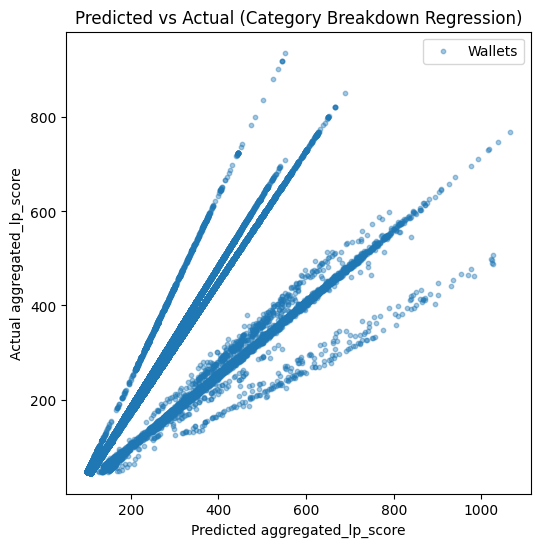

In [ ]:
import matplotlib.pyplot as plt

# Predicted values
pred = reg.predict(x)

plt.figure(figsize=(6,6))
plt.scatter(pred, y, alpha=0.4, s=10, label="Wallets")
plt.xlabel("Predicted aggregated_lp_score")
plt.ylabel("Actual aggregated_lp_score")
plt.title("Predicted vs Actual (Category Breakdown Regression)")
plt.legend()
plt.show()


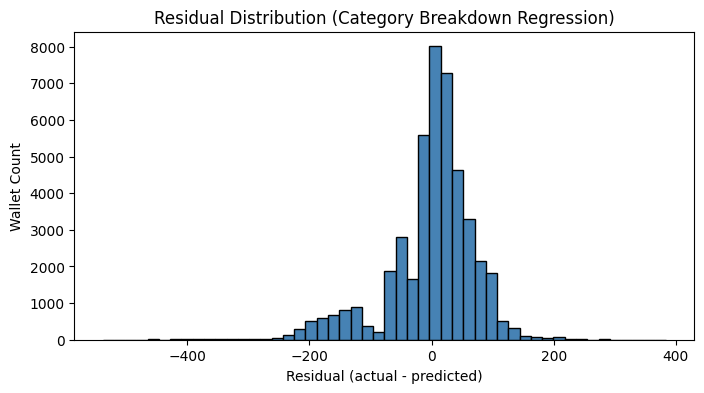

In [ ]:
residuals = y - pred

plt.figure(figsize=(8,4))
plt.hist(residuals, bins=50, color='steelblue', edgecolor='k')
# plt.axvline(0, color='red', linestyle='--', label="Zero Error")
plt.xlabel("Residual (actual - predicted)")
plt.ylabel("Wallet Count")
plt.title("Residual Distribution (Category Breakdown Regression)")
# plt.legend()
plt.show()
